In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1.数据读取

In [2]:
train_csv ='data/pm25_train.csv'
train_data = pd.read_csv(train_csv)
test_csv ='data/pm25_test.csv'
test_data = pd.read_csv(test_csv)
train_data.head(10)

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,2010-01-02,0,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
1,2010-01-02,1,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2,2010-01-02,2,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
3,2010-01-02,3,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
4,2010-01-02,4,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0
5,2010-01-02,5,109.0,-7,-6.0,1022.0,7.14,3,0,0,0,1,0
6,2010-01-02,6,105.0,-7,-6.0,1023.0,8.93,4,0,0,0,1,0
7,2010-01-02,7,124.0,-7,-5.0,1024.0,10.72,0,0,0,0,1,0
8,2010-01-02,8,120.0,-8,-6.0,1024.0,12.51,0,0,0,0,1,0
9,2010-01-02,9,132.0,-7,-5.0,1025.0,14.30,0,0,0,0,1,0


# 2.观察数据

In [3]:
train_data.isnull().sum()

date       0
hour       0
pm2.5      0
DEWP       0
TEMP       0
PRES       0
Iws        0
Is         0
Ir         0
cbwd_NE    0
cbwd_NW    0
cbwd_SE    0
cbwd_cv    0
dtype: int64

 可以看到date时间字段，尝试将其转化为年月日周 

In [4]:
import time
def getYear(dt):
    t = time.strptime(dt, '%Y-%m-%d')
    return t.tm_year
def getMonth(dt):
    t = time.strptime(dt, '%Y-%m-%d')
    return t.tm_mon 
def getDay(dt):
    t = time.strptime(dt, '%Y-%m-%d')
    return t.tm_mday
def getWeek(dt):
    t = time.strptime(dt,'%Y-%m-%d')
    return t.tm_wday

In [5]:
train_data['year']=train_data['date'].apply(getYear)
train_data['month']=train_data['date'].apply(getMonth)
train_data['day']=train_data['date'].apply(getDay)
train_data['week']=train_data['date'].apply(getWeek)

test_data['year']=test_data['date'].apply(getYear)
test_data['month']=test_data['date'].apply(getMonth)
test_data['day']=test_data['date'].apply(getDay)
test_data['week']=test_data['date'].apply(getWeek)

In [6]:
train_data.describe()

,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,year,month,day,week
count,35746.000000,35746.000000,35746.00000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.000000,35746.00000
mean,11.509819,98.805097,1.77950,12.413641,1016.427614,23.717183,0.057489,0.203463,0.114223,0.320176,0.350137,0.215465,2012.044341,6.516813,15.705058,3.00221
std,6.924821,92.006764,14.33629,12.165962,10.253854,48.847511,0.790715,1.485673,0.318086,0.466550,0.477019,0.411150,1.414755,3.454528,8.798033,2.15600
min,0.000000,0.000000,-40.00000,-19.000000,992.000000,0.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,0.00000
25%,6.000000,29.000000,-10.00000,2.000000,1008.000000,1.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000,4.000000,8.000000,1.00000
50%,12.000000,73.000000,2.00000,14.000000,1016.000000,5.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,7.000000,16.000000,4.00000
75%,18.000000,137.000000,15.00000,23.000000,1025.000000,21.920000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2013.000000,10.000000,23.000000,5.00000
max,23.000000,994.000000,28.00000,41.000000,1046.000000,565.490000,27.000000,36.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,31.000000,6.00000


# 3.看下我们要预测的y的分布情况

Skewness: 1.811953
Kurtosis: 4.915487


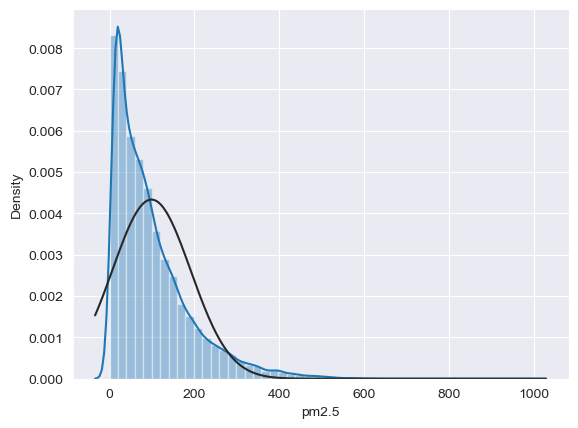

In [7]:
from scipy.stats import norm
sns.distplot(train_data['pm2.5'], fit=norm)
print("Skewness: %f" % train_data['pm2.5'].skew())
print("Kurtosis: %f" % train_data['pm2.5'].kurt())

我们可以看到要预测的pm2.5值正态分布可能性检测，偏度是右偏的，峰度4.9左右，与正态分布相距较远。

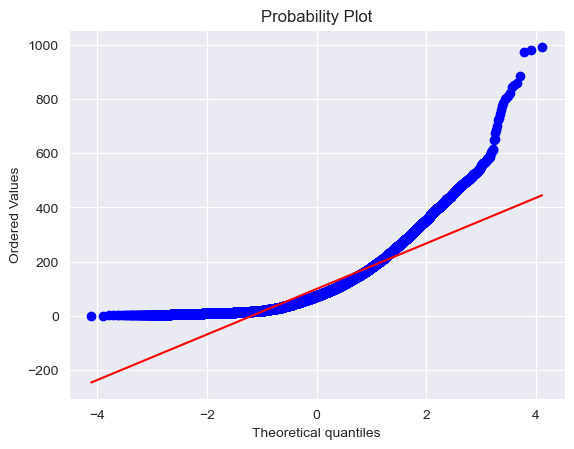

In [8]:
from scipy import stats
fig = plt.figure()
res = stats.probplot(train_data['pm2.5'], plot=plt)

我们先看下要预测的pm2.5值线性分布可能性检测，probplot函数计算一个当前样本最可能的线性分布，
            并用plt展示出来，我们可以直观的看到线性拟合程度并不好。

接下来我们做log转换，然后看看分布。0值做log转换会出错，我们看0值只有2条，drop掉

In [9]:
train_data[train_data['pm2.5']==0].head(10)    

,date,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,year,month,day,week
19058,2012-09-28,10,0.0,-5,20.0,1020.0,139.48,0,0,0,1,0,0,2012,9,28,4
19063,2012-09-28,15,0.0,-10,24.0,1017.0,192.68,0,0,0,1,0,0,2012,9,28,4


In [10]:
train_data = train_data.drop(train_data[train_data['pm2.5'] == 0].index)

Skewness: -0.364670
Kurtosis: -0.535320


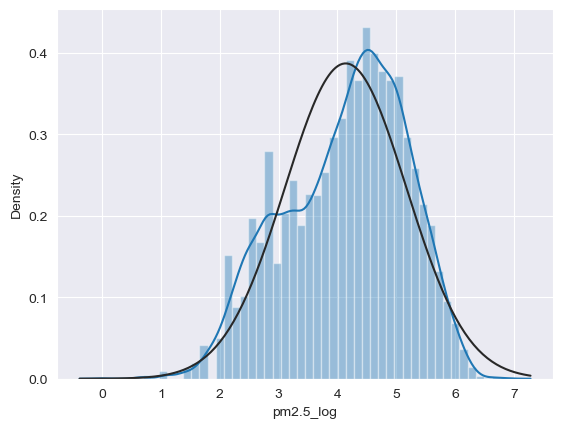

In [11]:
train_data['pm2.5_log'] = np.log(train_data['pm2.5']) 
sns.distplot(train_data['pm2.5_log'], fit=norm);
print("Skewness: %f" % train_data['pm2.5_log'].skew())
print("Kurtosis: %f" % train_data['pm2.5_log'].kurt())

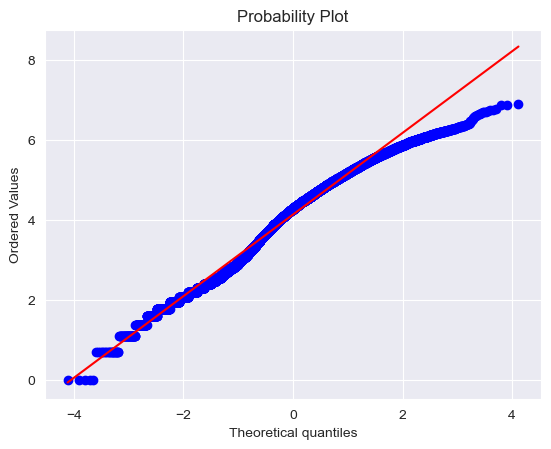

In [12]:
res = stats.probplot(train_data['pm2.5_log'], plot=plt)

可以看到，经过log转换过后，分布好多了。基本上可以进行线性拟合了。

# 4.接下来我们看下各个特征间的相关性

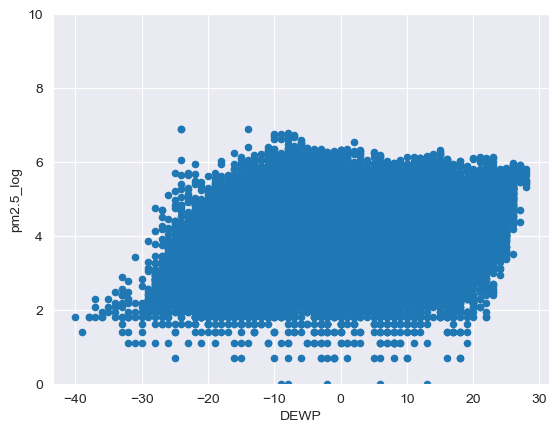

In [13]:
var = 'DEWP'
data = pd.concat([train_data['pm2.5_log'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='pm2.5_log', ylim=(0, 10));

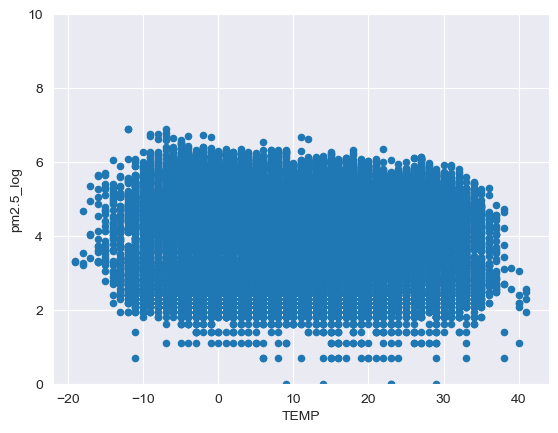

In [14]:
var = 'TEMP'
data = pd.concat([train_data['pm2.5_log'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='pm2.5_log', ylim=(0, 10));

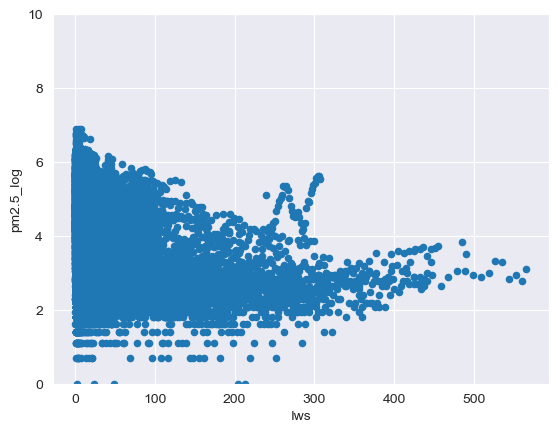

In [15]:
var = 'Iws'
data = pd.concat([train_data['pm2.5_log'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='pm2.5_log', ylim=(0, 10));

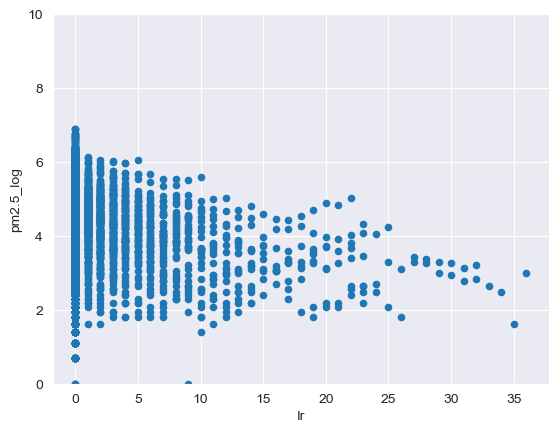

In [16]:
var = 'Ir'
data = pd.concat([train_data['pm2.5_log'], train_data[var]], axis=1)
data.plot.scatter(x=var, y='pm2.5_log', ylim=(0, 10));

散点图分布看，风速和降雨好像和pm2.5关系还挺大。其他特征没发现太大关系。

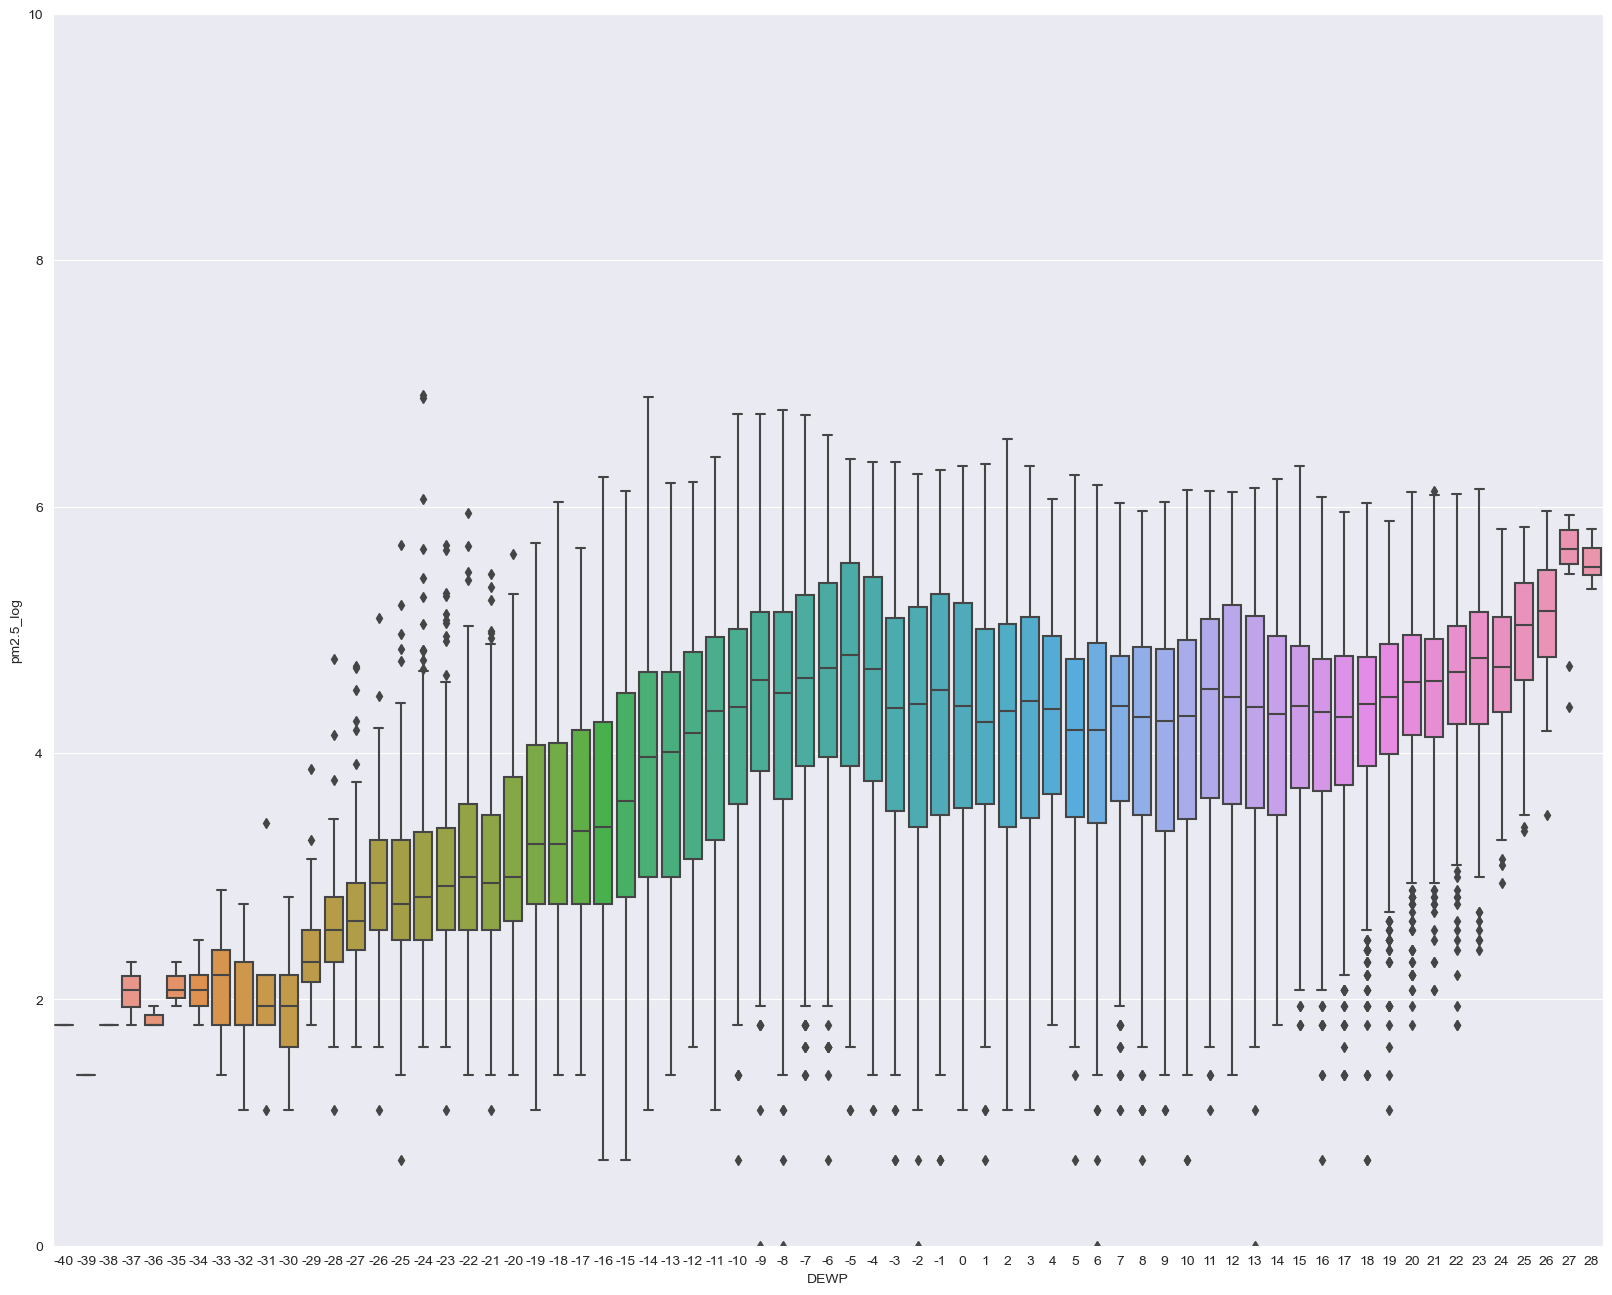

In [17]:
var = 'DEWP'
data = pd.concat([train_data['pm2.5_log'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 16))
fig = sns.boxplot(x=var, y="pm2.5_log", data=data)
fig.axis(ymin=0, ymax=10);

我们用箱线图看看露点和pm2.5的关系，好吧，我也不知道我想看到什么，或许我只是想画个箱线图吧，黑线脸。。。
我们还是看看想关性矩阵吧

<AxesSubplot:>

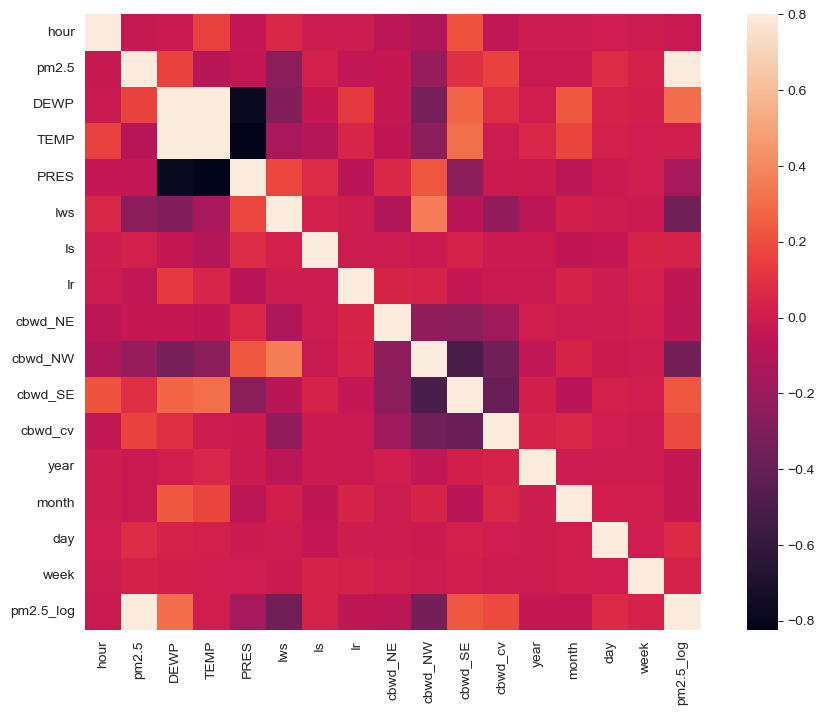

In [18]:
#correlation matrix
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, square=True)

我们详细看看正相关和负相关的5个特征，pm2.5特征应该干掉的。留着就留着吧，反正我后面不会用它，我就是用它来看看log值他俩到底有多相关。

In [19]:
k = 5 #number of variables for heatmap
cols_large = corrmat.nlargest(k, 'pm2.5_log')['pm2.5_log'].index 
cols_small = corrmat.nsmallest(k, 'pm2.5_log')['pm2.5_log'].index 

In [20]:
cols =cols_large.append(cols_small)
cols

Index(['pm2.5_log', 'pm2.5', 'DEWP', 'cbwd_SE', 'cbwd_cv', 'Iws', 'cbwd_NW',
       'PRES', 'cbwd_NE', 'Ir'],
      dtype='object')

In [21]:
cm = np.corrcoef(train_data[cols].values.T)

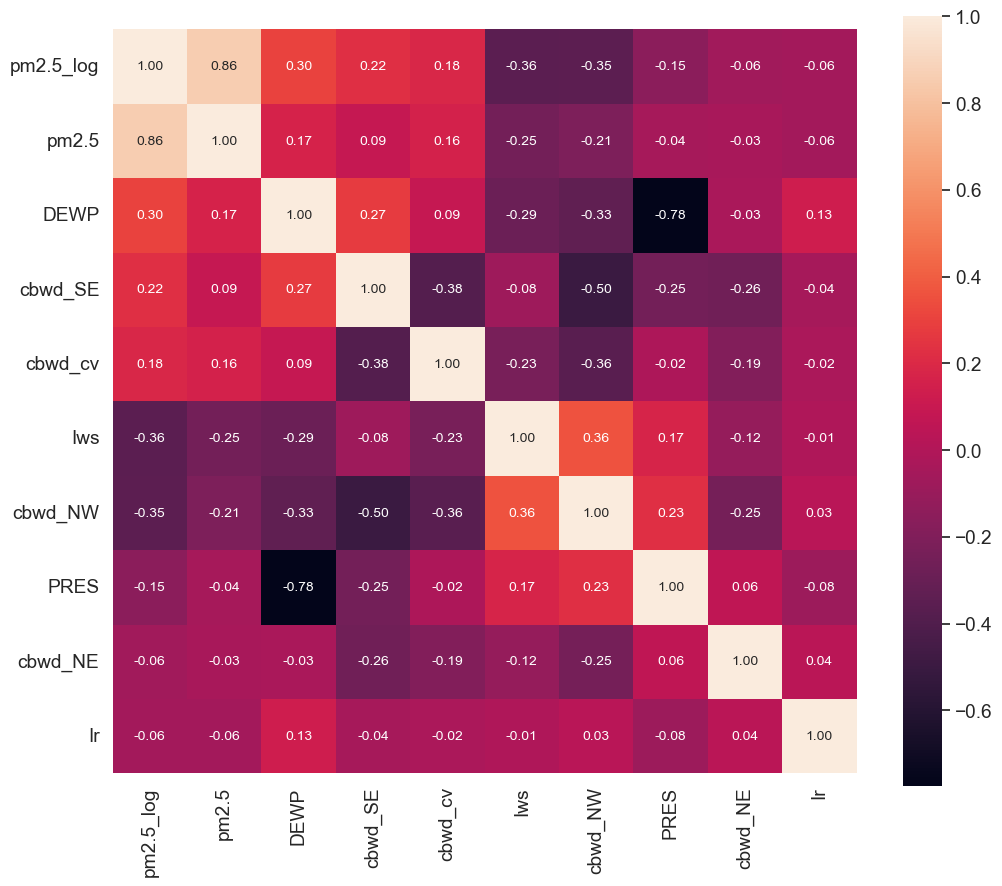

In [22]:
sns.set(rc = {"figure.figsize":(12,10)}) 
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# 5.线性模型尝试

我们先把数据类型改为float32

In [23]:
train_data['hour']=train_data['hour'].astype('float32')
train_data['DEWP']=train_data['DEWP'].astype('float32')
train_data['TEMP']=train_data['TEMP'].astype('float32')
train_data['PRES']=train_data['PRES'].astype('float32')
train_data['Iws']=train_data['Iws'].astype('float32')
train_data['Is']=train_data['Is'].astype('float32')
train_data['Ir']=train_data['Ir'].astype('float32')
train_data['cbwd_NE']=train_data['cbwd_NE'].astype('float32')
train_data['cbwd_NW']=train_data['cbwd_NW'].astype('float32')
train_data['cbwd_SE']=train_data['cbwd_SE'].astype('float32')
train_data['cbwd_cv']=train_data['cbwd_cv'].astype('float32')
train_data['year']=train_data['year'].astype('float32')
train_data['month']=train_data['month'].astype('float32')
train_data['day']=train_data['day'].astype('float32')
train_data['week']=train_data['week'].astype('float32')
train_data['pm2.5_log']=train_data['pm2.5_log'].astype('float32') 

In [24]:
test_data['hour']=test_data['hour'].astype('float32')
test_data['DEWP']=test_data['DEWP'].astype('float32')
test_data['TEMP']=test_data['TEMP'].astype('float32')
test_data['PRES']=test_data['PRES'].astype('float32')
test_data['Iws']=test_data['Iws'].astype('float32')
test_data['Is']=test_data['Is'].astype('float32')
test_data['Ir']=test_data['Ir'].astype('float32')
test_data['cbwd_NE']=test_data['cbwd_NE'].astype('float32')
test_data['cbwd_NW']=test_data['cbwd_NW'].astype('float32')
test_data['cbwd_SE']=test_data['cbwd_SE'].astype('float32')
test_data['cbwd_cv']=test_data['cbwd_cv'].astype('float32')
test_data['year']=test_data['year'].astype('float32')
test_data['month']=test_data['month'].astype('float32')
test_data['day']=test_data['day'].astype('float32')
test_data['week']=test_data['week'].astype('float32') 

In [25]:
train_data.columns

Index(['date', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir',
       'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'year', 'month', 'day',
       'week', 'pm2.5_log'],
      dtype='object')

1. 所有数值型变量都作为特征进行线性回归。我自己算的mse值和dcrace上不一致，暂时还不明白为什么。

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

# train_data.drop(['date'], axis=1, inplace=True)
y=train_data['pm2.5_log']
var =['hour','DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir',
       'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'year', 'month', 'day',
       'week'] 
X=train_data[var]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train) 
y_val_pre = reg.predict(X_val) 
y_val1= y_val.reset_index(drop=True)
print("Mean squared error: %.2f" % mean_squared_error(y_val1, y_val_pre ))  
df1 = pd.DataFrame (y_val_pre, columns = ['p'])  
df1['r'] = y_val 
df1.to_csv("data/test1.csv",encoding = "utf-8",header=1,index=0)

X_test = test_data[var]
y_test=reg.predict(X_test)
y_rel = np.round(np.exp(y_test)) 
df = pd.DataFrame (y_rel, columns = ['pm2.5'])
df.to_csv("data/sample.csv",encoding = "utf-8",header=1,index=0)

Mean squared error: 0.59


In [27]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

2.按照相关性选择特征，结果更差。dcrace上好于第一种。。。

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 

# train_data.drop(['date'], axis=1, inplace=True)
y=train_data['pm2.5_log']
var =['DEWP',  'Iws',  'Ir', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv']
X=train_data[var]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train) 
y_val_pre = reg.predict(X_val)
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pre))
X_test = test_data[var]
y_test=reg.predict(X_test)
y_rel = np.round(np.exp(y_test)) 
df.to_csv("data/sample_select.csv",encoding = "utf-8",header=1,index=0)

Mean squared error: 0.80


3.用pca进行降维处理，效果更差。但dcrace上mse为0了。。。难以理解，期待大神指点

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_pca=pca.transform(X)
print(pca.explained_variance_ratio_)  
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)
reg_pca = LinearRegression().fit(X_train, y_train) 
y_val_pre = reg_pca.predict(X_val)
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_val_pre))

X_test = test_data[var]
X_test_pca=pca.transform(X_test)
y_test=reg_pca.predict(X_test_pca)
y_rel = np.round(np.exp(y_test)) 
df = pd.DataFrame (y_rel, columns = ['pm2.5'])
df.to_csv("data/sample_pca.csv",encoding = "utf-8",header=1,index=0)

[9.268590e-01 7.206203e-02 8.374617e-04]
Mean squared error: 0.85


# 记录下标准化用法

In [30]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(train_data['pm2.5_log'][:,np.newaxis]);
saleprice_scaled[0:10]

array([[0.69785446],
       [0.8311694 ],
       [0.9007299 ],
       [1.0264692 ],
       [0.76329076],
       [0.53439903],
       [0.4981228 ],
       [0.65949905],
       [0.62768424],
       [0.72016066]], dtype=float32)